## OMOPSO

### Example

In [1]:
from jmetal.algorithm.multiobjective.omopso import OMOPSO
from jmetal.operator import UniformMutation
from jmetal.operator.mutation import NonUniformMutation
from jmetal.problem import ZDT1
from jmetal.util.archive import CrowdingDistanceArchive
from jmetal.util.termination_criterion import StoppingByEvaluations

problem = ZDT1()

mutation_probability = 1.0 / problem.number_of_variables
max_evaluations = 25000
swarm_size = 100

algorithm = OMOPSO(
    problem=problem,
    swarm_size=swarm_size,
    epsilon=0.0075,
    uniform_mutation=UniformMutation(probability=mutation_probability, perturbation=0.5),
    non_uniform_mutation=NonUniformMutation(mutation_probability, perturbation=0.5,
                                            max_iterations=int(max_evaluations / swarm_size)),
    leaders=CrowdingDistanceArchive(100),
    termination_criterion=StoppingByEvaluations(max=max_evaluations)
)

algorithm.run()
solutions = algorithm.get_result()

We can now visualize the Pareto front approximation:

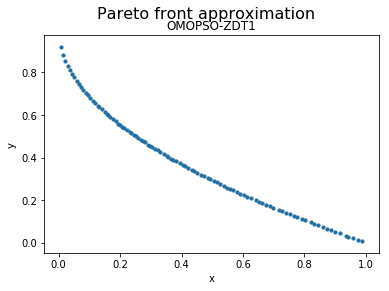

In [3]:
from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

front = get_non_dominated_solutions(solutions)

plot_front = Plot(plot_title='Pareto front approximation', axis_labels=['x', 'y'])
plot_front.plot(front, label='OMOPSO-ZDT1')

### API